In [1]:
#####Preliminary authentications and package loadings
consumer_key= 'XVYeivrXC9ECoj2rP8YFVkbOL'
consumer_secret= '5cVypcLC7dx8CfD8xn65mGL9EbFMZJw2L8DeeBiNx4SL9yWIkc'
access_token= '1493738062525779973-2XRNQLetgDtrpdN6nHIjmz2FBBFaFB'
access_token_secret= 'Pshj4J8faGkIFmQjrVAIWfJAXwKRt0WTM9SNSjAHOf370'
bearer_token='AAAAAAAAAAAAAAAAAAAAAPU8ZQEAAAAAGk7lwN4YdyK0Q8Af6XZq0NvL5qs%3DWH1X4LjRZY33XprMV7ZcVltxMO61DBqBbhTG3EwPkrkWiQssue'

import tweepy as tw
import pandas as pd
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [2]:
# to pandas df steps updated with geo
def res_to_pd(res):
	'''res: list of tweet objects'''
	all_fields_res = []
	for field in all_tweet_fields:
		all_fields_res.append([])
		for results in res:
			for result in results:
				all_fields_res[-1].append(result.get(field))
	df = pd.DataFrame()
	for idx, field_res in enumerate(all_fields_res):
		if all_tweet_fields[idx] == 'public_metrics':  # special treatment
			public_metrics = {k: [] for k in ['retweet_count', 'reply_count', 'like_count', 'quote_count']}
			for row in field_res:
				for key in public_metrics.keys():
					public_metrics[key].append(row[key])
			for key in public_metrics.keys():
				df[key] = public_metrics[key]
		elif all_tweet_fields[idx] == 'geo':  # special treatment
			geo = {k: [] for k in ['place_id']}
			for row in field_res:
				for key in geo.keys():
					geo[key].append(row[key])
			for key in geo.keys():
				df[key] = geo[key]
		else:
			df[all_tweet_fields[idx]] = field_res
	return df

In [3]:
###Query for words, variables we want etc. this is the test case to assure things are working
import tweepy as tw

client = tw.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAAPU8ZQEAAAAAGk7lwN4YdyK0Q8Af6XZq0NvL5qs%3DWH1X4LjRZY33XprMV7ZcVltxMO61DBqBbhTG3EwPkrkWiQssue')
start_time = '2021-01-01T00:00:00Z'
end_time = '2021-01-02T00:00:00Z'
query='(Feminism OR Patriarchy OR Misogyny OR Sexism OR Gender inequality OR Gender pay gap OR Masculinity OR Femininity OR Gender equality OR Sexual consent OR Gender equity OR Womenism OR Women’s empowerment OR Gender parity OR sexist OR feminist OR misogynist OR misandrist OR misandry OR MRA OR Men’s rights OR women’s rights OR patriarchal OR masculine OR feminine OR Title IX OR Sex positive OR Mansplain OR Feminazi OR estrogen OR testosterone OR womanizer OR manhater) lang:en -is:retweet place_country:US'
all_tweet_fields = ['author_id','id', 'public_metrics', 'text', 'source', 'referenced_tweets', 'created_at', 
                    'lang','geo']
all_user_fields=  ['created_at','description','entities','id','location','name','pinned_tweet_id','profile_image_url','protected','public_metrics','url','username','verified','withheld']

tweets = client.search_all_tweets(query=query,tweet_fields=all_tweet_fields,start_time=start_time,
                                  end_time=end_time, max_results=50)
res=[]
res.append(tweets.data)
data_twitter=res_to_pd(res)
data_twitter.head(10)

,author_id,id,retweet_count,reply_count,like_count,quote_count,text,source,referenced_tweets,created_at,lang,place_id
0,3130150996,1345157534882148354,1,0,0,1,Three masculine scents now available in new ja...,Twitter for iPhone,None,2021-01-01 23:58:42+00:00,en,01f9c9fd7bb1aa6b
1,40606788,1345155865528172545,1,0,1,0,"@SRuhle @politico @JanetYellen Sexism, as usual.",Twitter for Android,"[(type, id)]",2021-01-01 23:52:04+00:00,pt,94965b2c45386f87
2,478844415,1345154068868603905,1,0,1,0,govs need a collab strategy to compel big #tec...,Twitter for iPhone,"[(type, id)]",2021-01-01 23:44:56+00:00,en,5a110d312052166f
3,904050676862517249,1345153576620838913,1,0,3,1,"When it comes to war, women and girls are ofte...",Twitter for Android,"[(type, id)]",2021-01-01 23:42:59+00:00,en,e21c8e4914eef2b3
4,48438556,1345150557024100360,0,0,0,0,@RVAwonk nothing says feminist like changing y...,Twitter for Android,None,2021-01-01 23:30:59+00:00,en,00ca00906ca4c6d4
5,24727201,1345147773784645632,0,0,0,0,Wow that must be some hangover you have. Hope ...,Twitter for Android,None,2021-01-01 23:19:55+00:00,en,c0b8e8dc81930292
6,478837240,1345147475728863232,9,0,111,0,@MichelleHaak2 This type of patriarchal fake C...,Twitter for iPhone,"[(type, id)]",2021-01-01 23:18:44+00:00,en,01c060cf466c6ce3
7,2869901107,1345145613420294145,0,1,0,0,It’s subtlety in addressing toxic masculinity ...,Twitter for iPhone,"[(type, id)]",2021-01-01 23:11:20+00:00,en,207f2c7abbdb201b
8,742786713681022976,1345145045893013504,0,0,3,0,"damn gender equality got hands, i just wanna b...",Twitter for iPhone,None,2021-01-01 23:09:05+00:00,en,89e82c687111f62b
9,1598812760,1345144382714826752,0,0,1,0,MSM has been an epic failure for years. Misogy...,Twitter for iPhone,"[(type, id)]",2021-01-01 23:06:27+00:00,en,5faafada28b440c3


In [4]:
from datetime import datetime, timedelta
import time

raw_df = pd.DataFrame()
time_records = [] # for reference
iteration_counter = 0
start_time1 = datetime(2021, 12, 30, 23, 59, 59)
end_time1 = datetime(2021, 12, 31, 23, 59, 59)
while True:
	res = []
	start_time= start_time1+ timedelta(days=-iteration_counter)
	start_time = start_time.isoformat('T')+'Z'
	end_time= end_time1+ timedelta(days=-iteration_counter)
	end_time = end_time.isoformat('T')+'Z'
	query='(Feminism OR Patriarchy OR Misogyny OR Sexism OR Gender inequality OR Gender pay gap OR Masculinity OR Femininity OR Gender equality OR Sexual consent OR Gender equity OR Womenism OR Women’s empowerment OR Gender parity OR sexist OR feminist OR misogynist OR misandrist OR misandry OR MRA OR Men’s rights OR women’s rights OR patriarchal OR masculine OR feminine OR Title IX OR Sex positive OR Mansplain OR Feminazi OR estrogen OR testosterone OR womanizer OR manhater) lang:en -is:retweet place_country:US'
	all_tweet_fields = ['author_id','id', 'public_metrics', 'text', 'source', 'referenced_tweets', 'created_at', 
                    'lang','geo']
	res.append(client.search_all_tweets(query=query,tweet_fields=all_tweet_fields,start_time=start_time,end_time=end_time, max_results=500).data) # max_results = # of tweets fetched each time
	data_twitter=res_to_pd(res)
	raw_df = pd.concat([raw_df, data_twitter])
	search_time = datetime.now().strftime("%h%d_%H%M")
	time_records.append(search_time)
	iteration_counter += 1
	print(f"iterations done: {iteration_counter}")
	time.sleep(18) # sleep 18 seconds
	if len(raw_df)> 182500:
		break
########### while loop: fetch tweets END ###########
##Save to csv file
raw_df.to_csv('twitter_data_v1.csv')

iterations done: 1
iterations done: 2
iterations done: 3
iterations done: 4
iterations done: 5
iterations done: 6
iterations done: 7
iterations done: 8
iterations done: 9
iterations done: 10
iterations done: 11
iterations done: 12
iterations done: 13
iterations done: 14
iterations done: 15
iterations done: 16
iterations done: 17
iterations done: 18
iterations done: 19
iterations done: 20
iterations done: 21
iterations done: 22
iterations done: 23
iterations done: 24
iterations done: 25
iterations done: 26
iterations done: 27
iterations done: 28
iterations done: 29
iterations done: 30
iterations done: 31
iterations done: 32
iterations done: 33
iterations done: 34
iterations done: 35
iterations done: 36
iterations done: 37
iterations done: 38
iterations done: 39
iterations done: 40
iterations done: 41
iterations done: 42
iterations done: 43
iterations done: 44
iterations done: 45
iterations done: 46
iterations done: 47
iterations done: 48
iterations done: 49
iterations done: 50
iteration

iterations done: 397
iterations done: 398
iterations done: 399
iterations done: 400
iterations done: 401
iterations done: 402
iterations done: 403
iterations done: 404
iterations done: 405
iterations done: 406
iterations done: 407
iterations done: 408
iterations done: 409
iterations done: 410
iterations done: 411
iterations done: 412
iterations done: 413
iterations done: 414
iterations done: 415
iterations done: 416
iterations done: 417
iterations done: 418
iterations done: 419
iterations done: 420
iterations done: 421
iterations done: 422
iterations done: 423
iterations done: 424
iterations done: 425
iterations done: 426
iterations done: 427
iterations done: 428
iterations done: 429
iterations done: 430
iterations done: 431
iterations done: 432
iterations done: 433
iterations done: 434
iterations done: 435
iterations done: 436
iterations done: 437
iterations done: 438
iterations done: 439
iterations done: 440
iterations done: 441
iterations done: 442
iterations done: 443
iterations do

In [ ]:
##Read the Tweets in python
pd.set_option("display.max_colwidth", None)
print(data_twitter['text'])

In [5]:
raw_df.head(10)

,author_id,id,retweet_count,reply_count,like_count,quote_count,text,source,referenced_tweets,created_at,lang,place_id
0,512225400,1477067002477002757,5,3,41,0,"I recall once being unfairly criticized, which...",Twitter for iPhone,None,2021-12-31 23:59:50+00:00,en,5635c19c2b5078d1
1,1043494850291818496,1477066774269263875,0,0,2,0,@barrybutler9 @nyeblast @ChooseChicago @NikonU...,Twitter for iPhone,"[(type, id)]",2021-12-31 23:58:56+00:00,en,25d884784990a9af
2,214150532,1477066634326126593,0,1,1,0,@g8erlaw68 I just want this game to end so I c...,Twitter for iPhone,"[(type, id)]",2021-12-31 23:58:22+00:00,en,d049033410e9e81b
3,1127309580080275457,1477066618744180740,0,0,3,0,"@ananavarro This may sound overly sweet, but I...",Twitter for iPhone,"[(type, id)]",2021-12-31 23:58:19+00:00,en,0dd0c9c93b5519e1
4,1365587117439606786,1477066545927012358,0,1,1,0,@jeffrey99196499 @chibears62 @ChicagoBears I a...,Twitter for iPhone,"[(type, id)]",2021-12-31 23:58:01+00:00,en,1c69a67ad480e1b1
5,238701430,1477066523189649413,0,0,0,0,This would lead to the abortion clinic https:/...,Twitter for iPhone,"[(type, id)]",2021-12-31 23:57:56+00:00,en,60edfde178b362ff
6,1651718040,1477066483972853765,0,0,0,0,New Years Eve Plans:\n\nDrink\nMod wife’s stre...,Twitter for iPhone,None,2021-12-31 23:57:47+00:00,en,5635c19c2b5078d1
7,150221490,1477066309405978625,0,0,0,0,"@VABVOX Yes! Me, husband, more.",Twitter for iPhone,"[(type, id)]",2021-12-31 23:57:05+00:00,en,7dda05213481260c
8,1314018543587995648,1477066221900210181,0,0,2,0,What a Queen. And a perfect and fabulous endin...,Twitter for iPhone,"[(type, id)]",2021-12-31 23:56:44+00:00,en,b2e4e65d7b80d2c1
9,1417157800598249489,1477066155172917249,1,1,5,0,It’s been awhile since I’ve posted due to a lo...,Twitter for iPhone,None,2021-12-31 23:56:28+00:00,en,d2ddff69682ae534


# Username Data

In [ ]:
user_id=(twitter_df['author_id'].unique())


all_user_fields= ['created_at','description','id','location','name','pinned_tweet_id','protected','public_metrics','username','verified','withheld']

# to pandas df steps updated with geo
def res_to_pd2(res):
	'''res: list of tweet objects'''
	all_fields_res = []
	for field in all_user_fields:
		all_fields_res.append([])
		for results in res:
			for result in results:
				all_fields_res[-1].append(result.get(field))
	df = pd.DataFrame()
	for idx, field_res in enumerate(all_fields_res):
		if all_user_fields[idx] == 'public_metrics':  # special treatment
			public_metrics = {k: [] for k in ['followers_count', 'following_count', 'tweet_count', 'listed_count']}
			for row in field_res:
				for key in public_metrics.keys():
					public_metrics[key].append(row[key])
			for key in public_metrics.keys():
				df[key] = public_metrics[key]
		else:
			df[all_user_fields[idx]] = field_res
	return df

In [8]:
user_id=(twitter_df['author_id'].unique())


all_user_fields= ['created_at','description','id','location','name','pinned_tweet_id','protected','public_metrics','username','verified','withheld']


84166
182519


In [5]:
###Query for words, variables we want etc. this is the test case to assure things are working
import tweepy as tw

client = tw.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAAPU8ZQEAAAAAGk7lwN4YdyK0Q8Af6XZq0NvL5qs%3DWH1X4LjRZY33XprMV7ZcVltxMO61DBqBbhTG3EwPkrkWiQssue')
#start_time = '2021-01-01T00:00:00Z'
#end_time = '2021-01-02T00:00:00Z'
query='lang:en -is:retweet place_country:US'
all_tweet_fields = ['author_id','id', 'public_metrics', 'text', 'source', 'referenced_tweets', 'created_at', 
                    'lang','geo']
all_user_fields=  ['created_at','description','entities','id','location','name','pinned_tweet_id','profile_image_url','protected','public_metrics','url','username','verified','withheld']

from datetime import datetime, timedelta
import time

raw_df = pd.DataFrame()
time_records = [] # for reference
iteration_counter = 0
start_time1 = datetime(2021, 12, 31, 11, 59, 59)
end_time1 = datetime(2021, 12, 31, 23, 59, 59)
while True:
	res = []
	start_time= start_time1+ timedelta(hours=-iteration_counter*12)
	start_time = start_time.isoformat('T')+'Z'
	end_time= end_time1+ timedelta(hours=-iteration_counter*12)
	end_time = end_time.isoformat('T')+'Z'
	query='lang:en -is:retweet place_country:US'
	all_tweet_fields = ['author_id','id', 'public_metrics', 'text', 'source', 'referenced_tweets', 'created_at', 
                    'lang','geo']
	res.append(client.search_all_tweets(query=query,tweet_fields=all_tweet_fields,start_time=start_time,end_time=end_time, max_results=500).data) # max_results = # of tweets fetched each time
	data_twitter=res_to_pd(res)
	raw_df = pd.concat([raw_df, data_twitter])
	search_time = datetime.now().strftime("%h%d_%H%M")
	time_records.append(search_time)
	iteration_counter += 1
	print(f"iterations done: {iteration_counter}")
	time.sleep(18) # sleep 18 seconds
	if len(raw_df)> 250000:
		break
########### while loop: fetch tweets END ###########
##Save to csv file
raw_df.to_csv('twitter_data_all_tweets.csv')

iterations done: 1
iterations done: 2
iterations done: 3
iterations done: 4
iterations done: 5
iterations done: 6
iterations done: 7
iterations done: 8
iterations done: 9
iterations done: 10
iterations done: 11
iterations done: 12
iterations done: 13
iterations done: 14
iterations done: 15
iterations done: 16
iterations done: 17
iterations done: 18
iterations done: 19
iterations done: 20
iterations done: 21
iterations done: 22
iterations done: 23
iterations done: 24
iterations done: 25
iterations done: 26
iterations done: 27
iterations done: 28
iterations done: 29
iterations done: 30
iterations done: 31
iterations done: 32
iterations done: 33
iterations done: 34
iterations done: 35
iterations done: 36
iterations done: 37
iterations done: 38
iterations done: 39
iterations done: 40
iterations done: 41
iterations done: 42
iterations done: 43
iterations done: 44
iterations done: 45
iterations done: 46
iterations done: 47
iterations done: 48
iterations done: 49
iterations done: 50
iteration

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))

In [11]:
#raw_df.to_csv('twitter_data_all_tweets.csv')

raw_df.to_pickle('twitter_data_all_tweets.pkl')

NameError: name 'raw_df' is not defined

In [10]:
import pandas as pd
twitter_df_all = pd.read_csv(r"C:\Users\stokg\OneDrive\Jupyter Notebooks\twitter_data_all_tweets.csv")
twitter_df = pd.read_pickle(r"C:\Users\stokg\Downloads\twitter_data_v1_cleaned_with_loc_and_user.pkl")

twitter_df_all.to_pickle('twitter_data_all_tweets.pkl')

In [4]:
import numpy as np
keywords=["Patriarchy", "Misogyny", "Sexism", "Gender", "inequality", "Gender pay gap", "Masculinity", "Femininity", "Gender equality", "Sexual consent", "Gender equity", "Womenism", "Women’s empowerment", "Gender parity", "sexist", "feminist", "misogynist", "misandrist", "misandry", "MRA", "Men’s rights", "women’s rights", "patriarchal", "masculine", "feminine", "Title IX", "Sex positive", "Mansplain", "Feminazi", "estrogen", "testosterone", "womanizer", "manhater"
]
text=twitter_df_all["text"]
indicator=[]
for i in range(len(text)):
    if any(word in text[i] for word in keywords):
        indicator.append(1)
    else:
        indicator.append(0)
        
np.sum(indicator)


60

In [5]:
print(np.sum(indicator)/len(indicator))
print(len(indicator))

0.0007514183020451102
79849


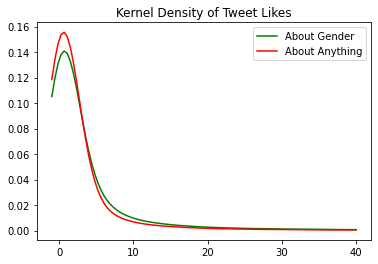

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity


gkde=KernelDensity(kernel='gaussian',bandwidth=2).fit(np.ravel(twitter_df["like_count"]).reshape(-1,1))
x=np.linspace(-1,40,100).reshape(-1,1)
reshape_gkde=np.exp(gkde.score_samples(x))
plt.plot(x, reshape_gkde,'g',label='About Gender')
gkde=KernelDensity(kernel='gaussian',bandwidth=2).fit(np.ravel(twitter_df_all["like_count"]).reshape(-1,1))
x=np.linspace(-1,40,100).reshape(-1,1)
reshape_gkde=np.exp(gkde.score_samples(x))
plt.plot(x, reshape_gkde,'r',label='About Anything')
plt.legend()
plt.title("Kernel Density of Tweet Likes")
plt.show()

# Preliminary Data Analysis

In [1]:
import pandas as pd
twitter_df = pd.read_csv(r"C:\Users\stokg\OneDrive\Jupyter Notebooks\twitter_data_v1.csv")
twitter_df
        

,Unnamed: 0,author_id,id,retweet_count,reply_count,like_count,quote_count,text,source,referenced_tweets,created_at,lang,place_id
0,0,39189472,1477065673939378177,0,0,0,0,even as I sit here in this silver lake coffee ...,Twitter for iPhone,NaN,2021-12-31 23:54:33+00:00,en,3b77caf94bfc81fe
1,1,88981023,1477065152994459652,0,0,1,0,@mona_s @Lt_Fedora Still lobbying for Barbie i...,Twitter for iPhone,[<ReferencedTweet id=1477048448964775937 type=...,2021-12-31 23:52:29+00:00,en,01fbdc902515ef96
2,2,759021667498627072,1477065021259661312,0,0,0,0,@VickiLynnLawson @xjelliott I look at our GOP ...,Twitter for iPhone,[<ReferencedTweet id=1476975641471893507 type=...,2021-12-31 23:51:58+00:00,en,e8ad2641c1cb666c
3,3,1374419199355883530,1477064581063352324,0,0,1,0,I thank God I have a very masculine man. I lov...,Twitter for iPhone,NaN,2021-12-31 23:50:13+00:00,en,4548df3d99bb4891
4,4,14399730,1477064397436690432,0,0,1,0,@StandardbredGal Wait a minute! Testosterone i...,Twitter for Android,[<ReferencedTweet id=1476967453628456969 type=...,2021-12-31 23:49:29+00:00,en,016727834eac6588
...,...,...,...,...,...,...,...,...,...,...,...,...,...
182514,223,1194032611359895552,1241154320692924417,0,0,3,0,Do you have more masculine or more feminine en...,Twitter for Android,NaN,2020-03-21 00:07:04+00:00,en,09ea48200ef6f5af
182515,224,822943016646283265,1241154057584156679,0,0,0,0,@GovMikeHuckabee Not funny you degenerate miso...,Twitter for Android,[<ReferencedTweet id=1241090455498117120 type=...,2020-03-21 00:06:01+00:00,en,01a11db77ef99e2a
182516,225,2776119562,1241152984572141569,0,1,0,0,@RiahKawaii she’s our dumbass feminist icon,Twitter for iPhone,[<ReferencedTweet id=1241150763063279616 type=...,2020-03-21 00:01:45+00:00,en,4548df3d99bb4891
182517,226,47248291,1241152962044583936,2,0,32,0,Dominate your psychology with this #powerpose ...,Instagram,NaN,2020-03-21 00:01:40+00:00,en,01a9a39529b27f36


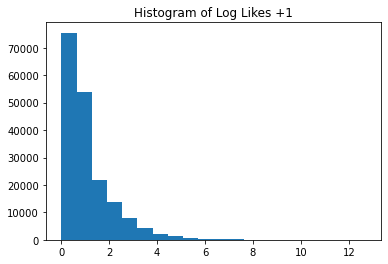

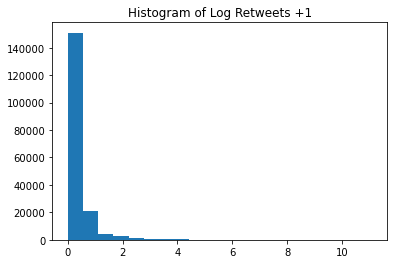

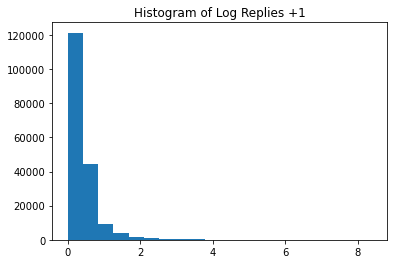

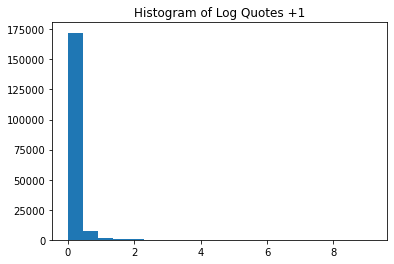

In [2]:
import numpy as np
import matplotlib.pyplot as plt

nr_bins = 20
plt.hist(np.log(twitter_df["like_count"]+1),bins=nr_bins);
plt.title("Histogram of Log Likes +1")
plt.show()

plt.hist(np.log(twitter_df["retweet_count"]+1),bins=nr_bins);
plt.title("Histogram of Log Retweets +1")
plt.show()

plt.hist(np.log(twitter_df["reply_count"]+1),bins=nr_bins);
plt.title("Histogram of Log Replies +1")
plt.show()
plt.hist(np.log(twitter_df["quote_count"]+1),bins=nr_bins);
plt.title("Histogram of Log Quotes +1")
plt.show()

In [21]:
from scipy.stats import skew, kurtosis
label = ['Mean', 'Variance', 'Skewness', 'Kurtosis', 'First Quartile', 'Median', \
         'Third Quartile']
value = [np.mean(twitter_df["like_count"]), np.var(twitter_df["like_count"], ddof=1), skew(twitter_df["like_count"], bias=False), kurtosis(twitter_df["like_count"], bias=False), \
         np.quantile(twitter_df["like_count"], 0.25), np.quantile(twitter_df["like_count"], 0.50), np.quantile(twitter_df["like_count"], 0.75)]
print('***Summary Statistics of Likes***')
for i in range(len(label)):
    print('{:<25} {}'.format(label[i], round(value[i],2)))
value = [np.mean(twitter_df["retweet_count"]), np.var(twitter_df["retweet_count"], ddof=1), skew(twitter_df["retweet_count"], bias=False), kurtosis(twitter_df["retweet_count"], bias=False), \
         np.quantile(twitter_df["retweet_count"], 0.25), np.quantile(twitter_df["retweet_count"], 0.50), np.quantile(twitter_df["retweet_count"], 0.75)]
print('***Summary Statistics of Retweets***')
for i in range(len(label)):
    print('{:<25} {}'.format(label[i], round(value[i],2)))
value = [np.mean(twitter_df["reply_count"]), np.var(twitter_df["reply_count"], ddof=1), skew(twitter_df["reply_count"], bias=False), kurtosis(twitter_df["reply_count"], bias=False), \
         np.quantile(twitter_df["reply_count"], 0.25), np.quantile(twitter_df["reply_count"], 0.50), np.quantile(twitter_df["reply_count"], 0.75)]
print('***Summary Statistics of Replies***')
for i in range(len(label)):
    print('{:<25} {}'.format(label[i], round(value[i],2)))
value = [np.mean(twitter_df["quote_count"]), np.var(twitter_df["quote_count"], ddof=1), skew(twitter_df["quote_count"], bias=False), kurtosis(twitter_df["quote_count"], bias=False), \
         np.quantile(twitter_df["quote_count"], 0.25), np.quantile(twitter_df["quote_count"], 0.50), np.quantile(twitter_df["quote_count"], 0.75)]
print('***Summary Statistics of Quotes***')
for i in range(len(label)):
    print('{:<25} {}'.format(label[i], round(value[i],2)))

***Summary Statistics of Likes***
Mean                      18.01
Variance                  1269355.26
Skewness                  239.68
Kurtosis                  63764.67
First Quartile            0.0
Median                    1.0
Third Quartile            3.0
***Summary Statistics of Retweets***
Mean                      2.68
Variance                  32821.61
Skewness                  286.33
Kurtosis                  96533.42
First Quartile            0.0
Median                    0.0
Third Quartile            0.0
***Summary Statistics of Replies***
Mean                      0.86
Variance                  245.29
Skewness                  168.74
Kurtosis                  39382.53
First Quartile            0.0
Median                    0.0
Third Quartile            1.0
***Summary Statistics of Quotes***
Mean                      0.34
Variance                  758.42
Skewness                  264.84
Kurtosis                  83335.36
First Quartile            0.0
Median                 

In [19]:
len(twitter_df["quote_count"])

182519

In [3]:
keywords=["Patriarchy", "Misogyny", "Sexism", "Gender", "inequality", "Gender pay gap", "Masculinity", "Femininity", "Gender equality", "Sexual consent", "Gender equity", "Womenism", "Women’s empowerment", "Gender parity", "sexist", "feminist", "misogynist", "misandrist", "misandry", "MRA", "Men’s rights", "women’s rights", "patriarchal", "masculine", "feminine", "Title IX", "Sex positive", "Mansplain", "Feminazi", "estrogen", "testosterone", "womanizer", "manhater"
]
text=twitter_df["text"]

counts=np.zeros(len(keywords))
for j in range(len(keywords)):
    for i in range(len(text)):
        if keywords[j].casefold() in text[i].casefold():
            counts[j]+=1

for i in range(0,len(keywords)):
    print(keywords[i],counts[i])

Patriarchy 10558.0
Misogyny 18018.0
Sexism 11382.0
Gender 8056.0
inequality 708.0
Gender pay gap 245.0
Masculinity 16011.0
Femininity 2776.0
Gender equality 1679.0
Sexual consent 94.0
Gender equity 627.0
Womenism 2.0
Women’s empowerment 389.0
Gender parity 147.0
sexist 23586.0
feminist 16697.0
misogynist 9620.0
misandrist 363.0
misandry 483.0
MRA 1550.0
Men’s rights 5618.0
women’s rights 5402.0
patriarchal 3235.0
masculine 14368.0
feminine 21010.0
Title IX 2761.0
Sex positive 531.0
Mansplain 2587.0
Feminazi 220.0
estrogen 2379.0
testosterone 6379.0
womanizer 1528.0
manhater 14.0


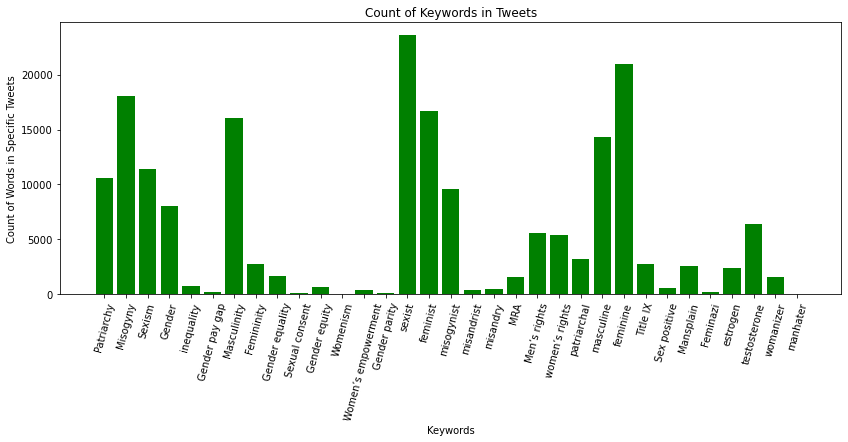

In [5]:
x_pos = [i for i, _ in enumerate(keywords)]
plt.figure(figsize=(14,5))
plt.bar(x_pos, counts, color='green')
plt.xlabel("Keywords")
plt.ylabel("Count of Words in Specific Tweets")
plt.title("Count of Keywords in Tweets")
plt.xticks(x_pos, keywords,rotation=75, fontsize=10)
plt.show()

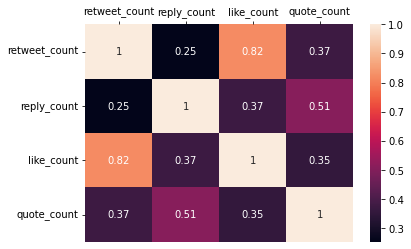

In [50]:
import pandas as pd
import seaborn as sn
correl_df=twitter_df[twitter_df.columns[3:7]]
corrMatrix = correl_df.corr()
sn.heatmap(corrMatrix, annot=True).xaxis.tick_top()
plt.show()

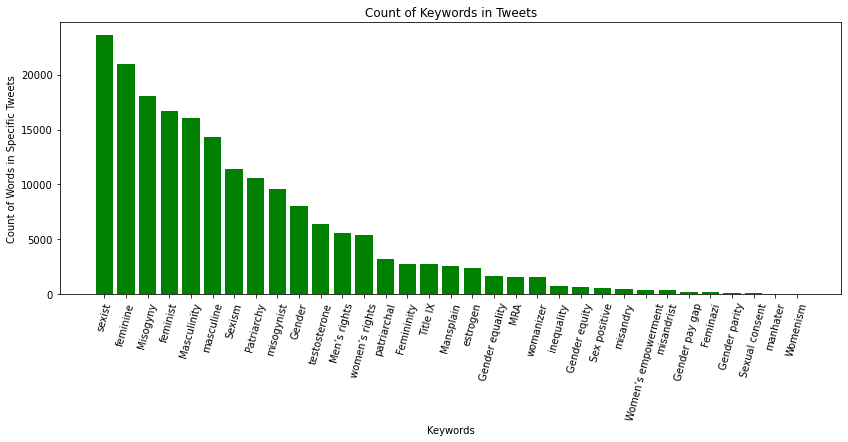

In [25]:
grouped=pd.DataFrame([keywords,counts]).T
grouped.columns=['Keywords','Counts']
grouped=grouped.sort_values(["Counts"],ascending=False)

x_pos = [i for i, _ in enumerate(grouped["Keywords"])]
plt.figure(figsize=(14,5))
plt.bar(x_pos, grouped["Counts"], color='green')
plt.xlabel("Keywords")
plt.ylabel("Count of Words in Specific Tweets")
plt.title("Count of Keywords in Tweets")
plt.xticks(x_pos,grouped["Keywords"],rotation=75, fontsize=10)
plt.show()